# Adult Census Income - Exploratory Data Analysis (EDA)
## Executive Summary
- Sex has a confounding effect on most variables in relation to income
- Someone working longer hours will likely be in the >50K income bracket
- The older an individual is the more likely they are to be in the <50K income bracket

## Introduction
- Purpose: The intent behind this analysis was to determine distribution of individual variable and how varying variables have an affect on income
- Dataset: [Adult- UCI Machine Learning](https://archive.ics.uci.edu/dataset/2/adult)
- Scope:
    - Describe, visualize and interpret demographic patterns
    - Understand how age, education, hours worked, occupation and marital status relate to income level
    - Utilize charts, summary table and cross-tabs to examine patterns

## Dataset Overview
- **Number of Rows & Columns**: 32561 x 16
- **Feature Descriptions**:
| Column | Description |
| :----- | :---------- |
| age | Age of individual in years |
| education | Highest level of education achieved |
| workclass | Type of employer |
| education_num | Numeric representation of ducation level |
| marital_status | Marital status category |
| occupation | Line of Profession |
| relationship | Family role |
| race | Race classification |
| sex | Gender |
| capital-gain | Investment income not from wage |
| capital-loss | Capital losses offsetting gains |
| hours-per-week | Number of hours worked per week |
| native-country | Country of origin |
| income | Total wages either <=50K or >50K |
- **Target Variable**: Income
- **Categorical Columns**: workclass, education, marital_status, occupation, relationship, race, sex, native_country, income
- **Numerical Columns**: age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week

In [24]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import chi2_contingency, ttest_ind

# Load cleaned data
df = pd.read_csv(r"C:/Users/darre/adult_census_eda/data/adult_cleaned.csv")

# Set seaborn style
sns.set(style="whitegrid")

np.set_printoptions(legacy='1.25')

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [60]:
# Dataset Characteristics
display("Rows x Columns:", df.shape)
display("Unique Values Per Column:", df.nunique())
display(df.info())
df.describe()

'Rows x Columns:'

(32561, 16)

'Unique Values Per Column:'

age                  73
workclass             8
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           14
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       41
income                2
hours_bin             5
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       30725 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education_num   32561 non-null  int64   
 5   marital_status  32561 non-null  category
 6   occupation      30718 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital_gain    32561 non-null  int64   
 11  capital_loss    32561 non-null  int64   
 12  hours_per_week  32561 non-null  int64   
 13  native_country  31978 non-null  category
 14  income          32561 non-null  category
 15  hours_bin       32561 non-null  category
dtypes: category(10), int64(6)
memory usage: 1.8 MB


None

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [26]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    df[col] = df[col].astype("category")
cat_cols = df.select_dtypes(include='category').columns

print("Numeric columns:", numeric_cols)
print("Categorical columns:", cat_cols)

Numeric columns: Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')
Categorical columns: Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


## Univariate Insights
Understand distribution of individual features

### Age Distribution

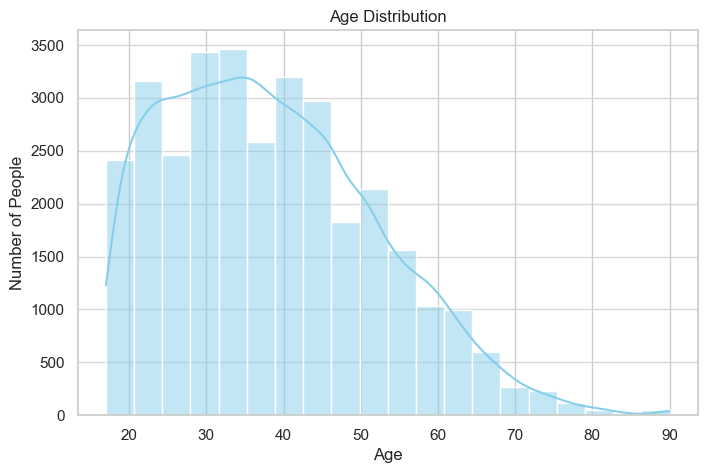

In [27]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'],bins=20,kde=True,color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.grid(axis='y', alpha=0.75)
plt.savefig(r"C:/Users/darre/adult_census_eda/charts/age_distribution.png", bbox_inches='tight')
plt.show()

- Most people are between 25 and 45 years old
- The largest group are those of the ages 30-35 years old

### Distribution of Hours Worked Per Week

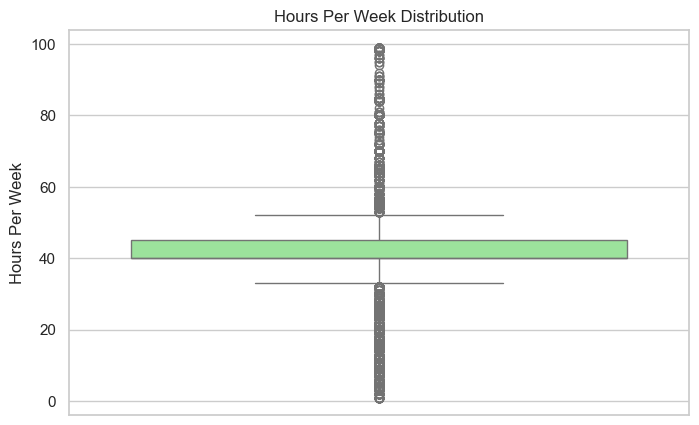

In [28]:
# Hours per week Distribution
plt.figure(figsize=(8,5))
sns.boxplot(y=df['hours_per_week'], color='lightgreen')
plt.title("Hours Per Week Distribution")
plt.ylabel("Hours Per Week")
plt.savefig(r"C:/Users/darre/adult_census_eda/charts/hours_per_week_distribution.png", bbox_inches='tight')
plt.show()

- Most respondents work a 40 hour work week
- Outliers exist as low as no hours worked and as high as 100 hours worked in a week

### Distribution of Capital Gains

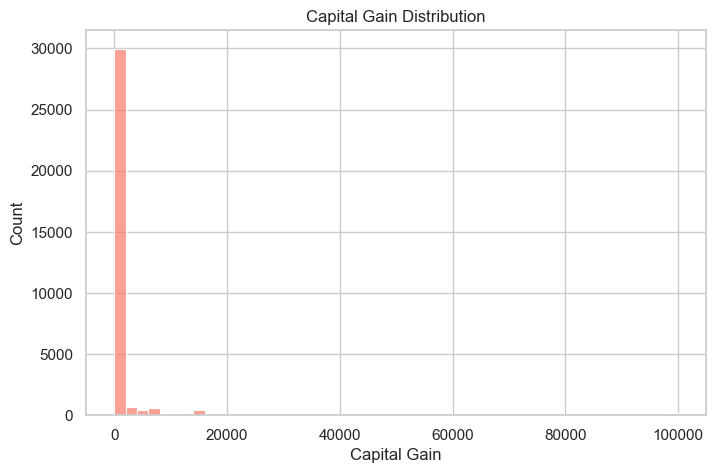

In [29]:
# Capital Gain Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['capital_gain'], bins=50, color='salmon')
plt.title("Capital Gain Distribution")
plt.xlabel("Capital Gain")
plt.ylabel("Count")
plt.savefig(r"C:/Users/darre/adult_census_eda/charts/capital_gain_distribution.png", bbox_inches='tight')
plt.show()

- Almost the entirety of respondents reported no capital gains

### Counts by Education

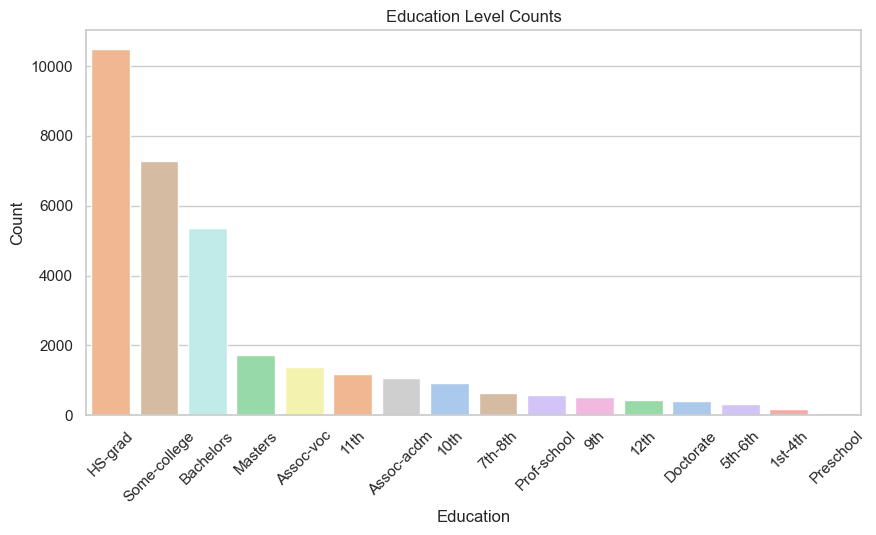

In [61]:
# Counts by Education
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, hue='education', legend=False, palette='pastel')
plt.xticks(rotation=45)
plt.title("Education Level Counts")
plt.xlabel("Education")
plt.ylabel("Count")
plt.savefig(r"C:/Users/darre/adult_census_eda/charts/count_by_education.png", bbox_inches='tight')
plt.show()

- The majority of respondents are high school graduates, have some college experience or hold a Bachelor's degree

### Counts by Occupation

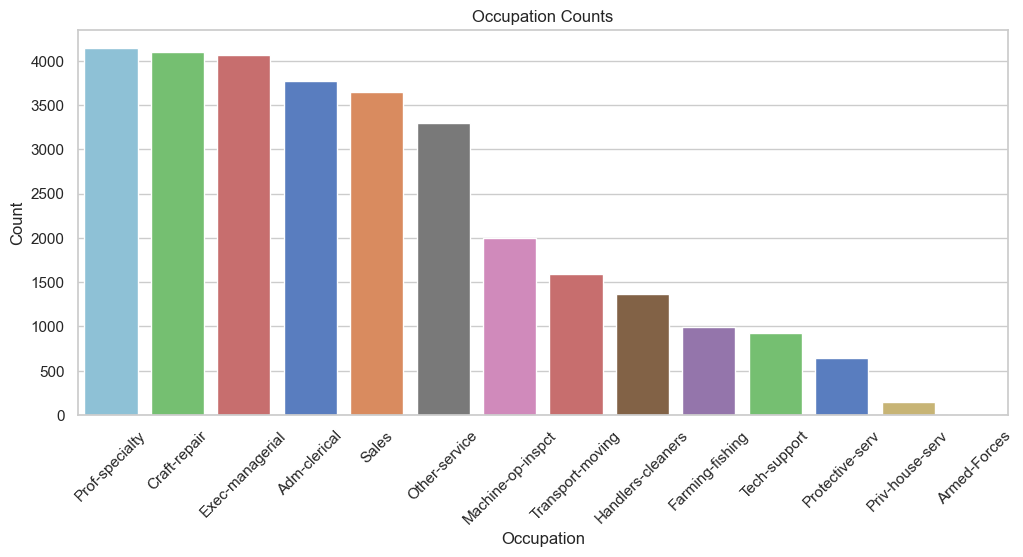

In [62]:
# Counts by Occupation
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='occupation', order=df['occupation'].value_counts().index, hue='occupation',legend=False, palette='muted')
plt.xticks(rotation=45)
plt.title("Occupation Counts")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.savefig(r"C:/Users/darre/adult_census_eda/charts/count_by_occupation.png", bbox_inches='tight')
plt.show()

- Fairly equal distribution among the top half of occupation categories

### Counts by Workclass

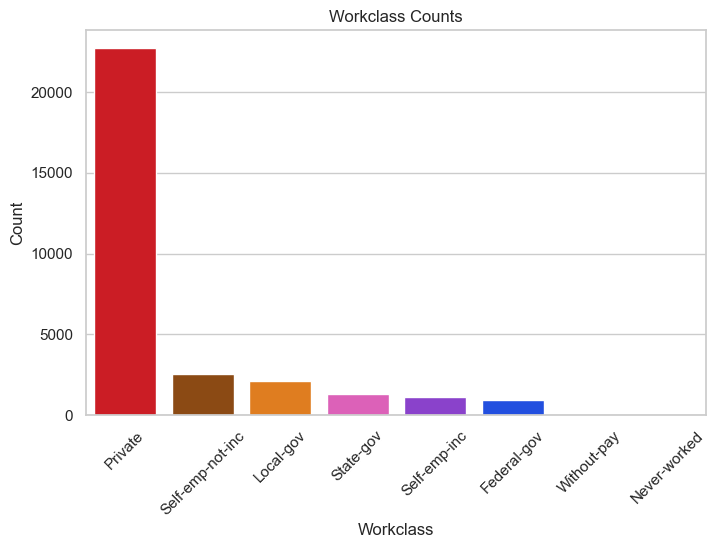

In [63]:
# Counts by Workclass
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='workclass', order=df['workclass'].value_counts().index, hue='workclass', legend=False, palette='bright')
plt.xticks(rotation=45)
plt.title("Workclass Counts")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.savefig(r"C:/Users/darre/adult_census_eda/charts/count_by_workclass.png", bbox_inches='tight')
plt.show()

- Majority of respondents are in the private sector

### Distribution of Income Categories

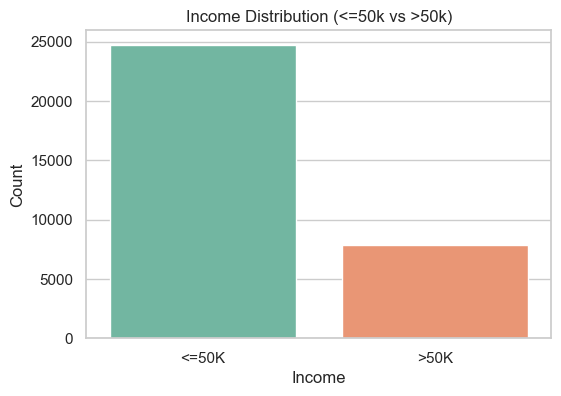

In [33]:
# Income Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='income', hue='income',legend=False, palette='Set2')
plt.title("Income Distribution (<=50k vs >50k)")
plt.xlabel("Income")
plt.ylabel("Count")
plt.savefig(r"C:/Users/darre/adult_census_eda/charts/income_distribution.png", bbox_inches='tight')
plt.show()

- 3/4th's of respondents reported earning less than or equal to 50K

### Summary of Univariate Findings
- Most respondents are of the ages 25 to 45 years old
- Fairly equal distribution of top half occupation categories
- Most respondents work in the private sector

## Bivariate Insights

### Age vs. Income

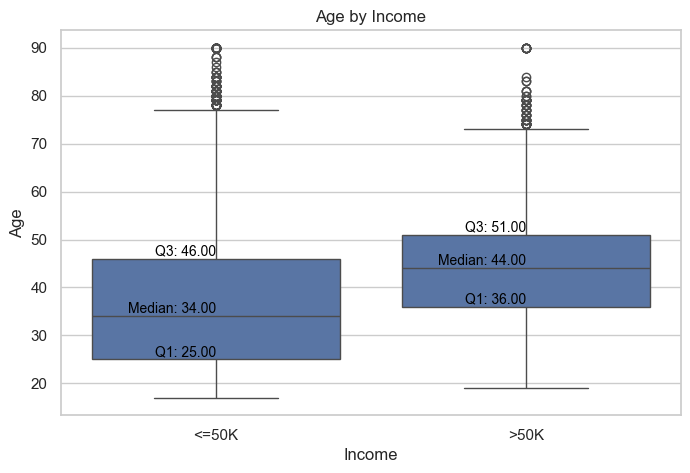

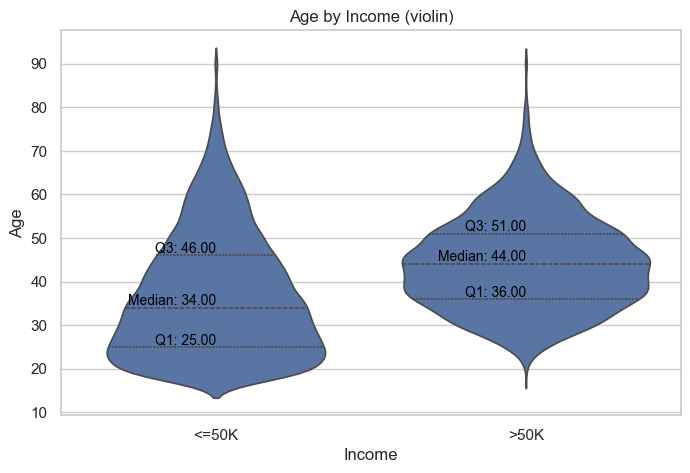

In [70]:
# Distribution of Age by Income as a Box and Violin plot
medians = df.groupby(['income'], observed=False)['age'].median()   
quartile1 = df.groupby(['income'], observed=False)['age'].quantile(0.25)
quartile3 = df.groupby(['income'], observed=False)['age'].quantile(0.75)

plt.figure(figsize=(8,5))
ax = sns.boxplot(x='income',y='age',data=df)
for i, day in enumerate(df['income'].unique()):
    # Get the x-position for the current box
    x_pos = i
    
    # Median Label
    ax.text(x_pos, medians[day], f'Median: {medians[day]:.2f}',
            ha='right', va='bottom', color='black', fontsize=10)
    
    # Quartile 1 Label
    ax.text(x_pos, quartile1[day], f'Q1: {quartile1[day]:.2f}',
            ha='right', va='bottom', color='black', fontsize=10)

    # Quartile 3 Label
    ax.text(x_pos, quartile3[day], f'Q3: {quartile3[day]:.2f}',
            ha='right', va='bottom', color='black', fontsize=10)
plt.title('Age vs. Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.savefig(r"C:/Users/darre/adult_census_eda/charts/distribution_of_age_by_income_box.png", bbox_inches='tight')
plt.show()

# Violin for density + median
plt.figure(figsize=(8,5))
fx = sns.violinplot(x='income',y='age', data=df, inner='quartile')
for i, day in enumerate(df['income'].unique()):
    # Get the x-position for the current box
    x_pos = i
    
    # Median Label
    fx.text(x_pos, medians[day], f'Median: {medians[day]:.2f}',
            ha='right', va='bottom', color='black', fontsize=10)
    
    # Quartile 1 Label
    fx.text(x_pos, quartile1[day], f'Q1: {quartile1[day]:.2f}',
            ha='right', va='bottom', color='black', fontsize=10)

    # Quartile 3 Label
    fx.text(x_pos, quartile3[day], f'Q3: {quartile3[day]:.2f}',
            ha='right', va='bottom', color='black', fontsize=10)
plt.title('Age by Income (violin)')
plt.xlabel('Income')
plt.ylabel('Age')
plt.savefig(r"C:/Users/darre/adult_census_eda/charts/distribution_of_age_by_income_violin.png", bbox_inches='tight')
plt.show()

- Median Age Difference: 10 years
- Inner Quartile Range (Spread): <=50K is 25 to 46 years old, >50K is 36 to 51 years old
- Outliers (<=50K): Exist above 77 years old
- Outliers (>50K): Exist above 73 years old

### Hours Worked vs Income

Income Category: <=50K
Median: 40.0, Q1: 35.0, Q3: 40.0
Income Category: >50K
Median: 40.0, Q1: 40.0, Q3: 50.0


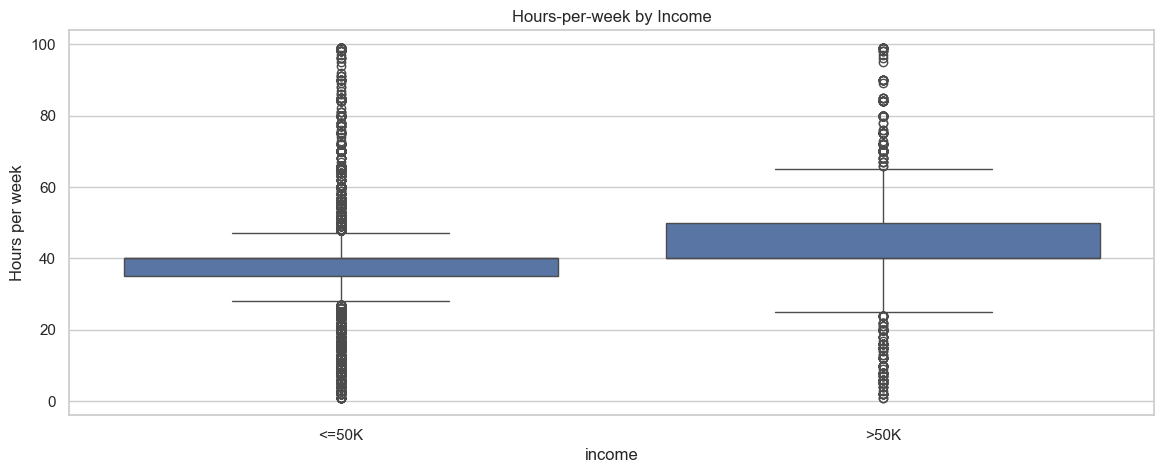

In [79]:
# Distribution of Hours per week by Income
medians_hours = df.groupby(['income'], observed=False)['hours_per_week'].median()
quartile1_hours = df.groupby(['income'], observed=False)['hours_per_week'].quantile(0.25)
quartile3_hours = df.groupby(['income'], observed=False)['hours_per_week'].quantile(0.75)

plt.figure(figsize=(14,5))
hx = sns.boxplot(x='income', y='hours_per_week', data=df)
for i, category in enumerate(df['income'].unique()):
    # Median
    print(f"Income Category: {category}")
    print(f'Median: {medians_hours[category]}, Q1: {quartile1_hours[category]}, Q3: {quartile3_hours[category]}')
plt.title('Hours-per-week by Income')
plt.ylabel('Hours per week')
plt.savefig(r"C:/Users/darre/adult_census_eda/charts/distribution_of_hours_per_week_by_income.png", bbox_inches='tight')
plt.show()

- No difference between the median hours worked
- Inner Quartile Range (Spread): <=50K is 35 to 40 hours worked, >50K is 40 to 50 hours worked
- Outliers (<=50K): Exist below 27.5 hours worked and above 47.5 hours worked
- Outliers (>50K): Exist below 25 hours worked and above 65 hours worked

### Summary Table for Numerical Variables vs Income

In [80]:
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
df.groupby('income', observed=False)[num_cols].agg(['count','mean','median','std']).round(2).T

income                     <=50K       >50K
age            count    24720.00    7841.00
               mean        36.78      44.25
               median      34.00      44.00
               std         14.02      10.52
fnlwgt         count    24720.00    7841.00
               mean    190340.87  188005.00
               median  179465.00  176101.00
               std     106482.27  102541.78
education_num  count    24720.00    7841.00
               mean         9.60      11.61
               median       9.00      12.00
               std          2.44       2.39
capital_gain   count    24720.00    7841.00
               mean       148.75    4006.14
               median       0.00       0.00
               std        963.14   14570.38
capital_loss   count    24720.00    7841.00
               mean        53.14     195.00
               median       0.00       0.00
               std        310.76     595.49
hours_per_week count    24720.00    7841.00
               mean        38.84      45.47
               median      40.00      40.00
               std         12.32      11.01

## Categorical Features vs Income

In [37]:
edu_tab = pd.crosstab(df['education'], df['income'])
edu_pct = (edu_tab['>50K'] / edu_tab.sum(axis=1)).round(2).sort_values(ascending=False)
edu_pct.head(15)

education
Doctorate       0.74
Prof-school     0.73
Masters         0.56
Bachelors       0.41
Assoc-voc       0.26
Assoc-acdm      0.25
Some-college    0.19
HS-grad         0.16
12th            0.08
10th            0.07
7th-8th         0.06
5th-6th         0.05
11th            0.05
9th             0.05
1st-4th         0.04
dtype: float64

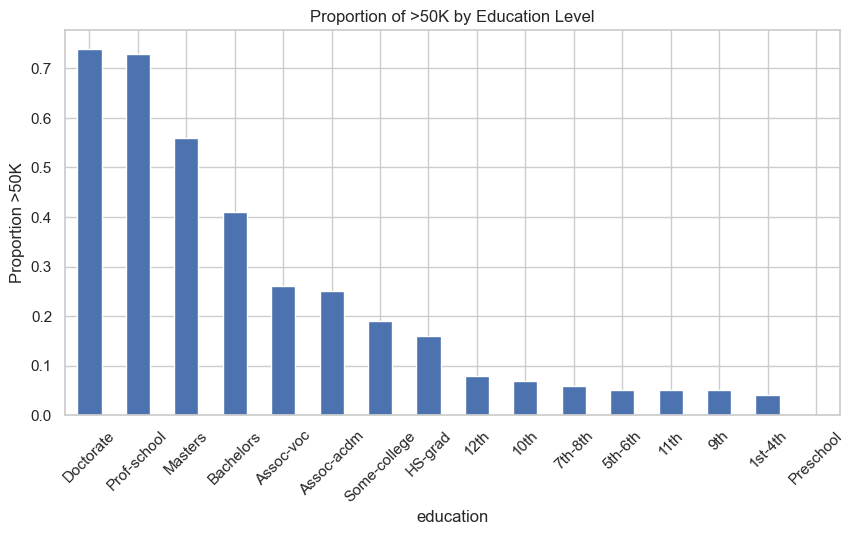

In [38]:
# Proportion >50K by Education
plt.figure(figsize=(10,5))
edu_pct.plot(kind='bar')
plt.title('Proportion of >50K by Education Level')
plt.ylabel('Proportion >50K')
plt.xticks(rotation=45)
plt.savefig(r"C:/Users/darre/adult_census_eda/charts/proportion_of_greatertthan50K_by_education.png", bbox_inches='tight')
plt.show()

- Respondents who hold a college degree have a higher liklihood of having an income greater than 50K
- The higher the level of education, the larger proportion of >50K income holders

### Occupation by Income Category

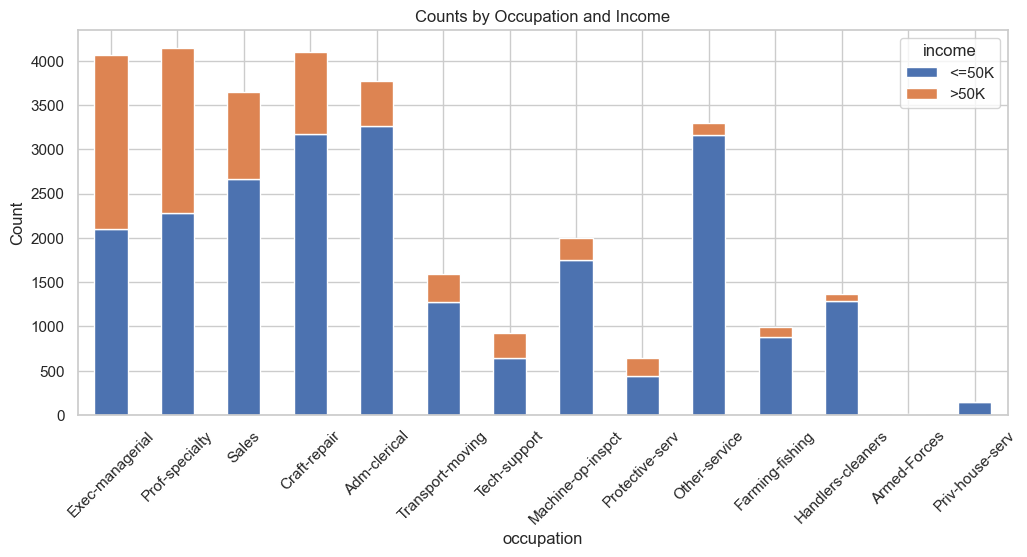

In [39]:
# Total count of occupation by Income Category
occ_tab = pd.crosstab(df['occupation'], df['income']).sort_values('>50K', ascending=False)
occ_tab.plot(kind='bar', stacked=True, figsize=(12,5))
plt.title('Counts by Occupation and Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig(r"C:/Users/darre/adult_census_eda/charts/counts_of_occupation_by_income_category.png", bbox_inches='tight')
plt.show()

- It is noticeable that specific categories (exec-managerial, prof-speciality, sales) have a greater proportion of individuals who have an income >50K

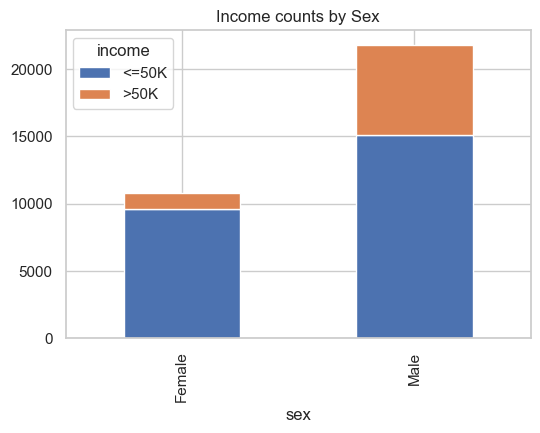

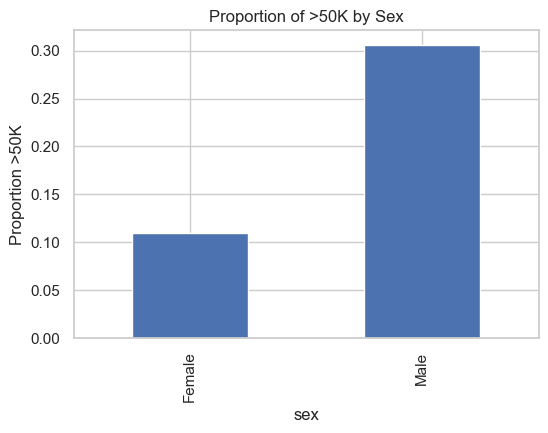

In [40]:
# Counts and Proportions of income categories by sex
sex_tab = pd.crosstab(df['sex'], df['income'])
sex_tab_norm = sex_tab.div(sex_tab.sum(axis=1), axis=0)  # row-wise proportion

sex_tab.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title('Income counts by Sex')
plt.savefig(r"C:/Users/darre/adult_census_eda/charts/counts_of_income_categories_by_sex.png", bbox_inches='tight')
plt.show()

sex_tab_norm['>50K'].plot(kind='bar', figsize=(6,4))
plt.title('Proportion of >50K by Sex')
plt.ylabel('Proportion >50K')
plt.savefig(r"C:/Users/darre/adult_census_eda/charts/proportion_of_greaterthan50K_by_sex.png", bbox_inches='tight')
plt.show()


- Males have a higher proportion of >50K income holders

### Cross Tab and Statistical Checks

In [41]:
# normalized by row
pd.crosstab(df['education'], df['income'], normalize='index').round(2)

income,<=50K,>50K
education,,
10th,0.93,0.07
11th,0.95,0.05
12th,0.92,0.08
1st-4th,0.96,0.04
5th-6th,0.95,0.05
7th-8th,0.94,0.06
9th,0.95,0.05
Assoc-acdm,0.75,0.25
Assoc-voc,0.74,0.26


In [42]:
# Chi-Square for Independec
tab = pd.crosstab(df['education'], df['income'])
chi2, p, dof, expected = chi2_contingency(tab)
round(chi2, 2), round(p, 2)

(4429.65, 0.0)

In [43]:
# T-test (Ages of the two income groups)
ages_high = df[df['income'] == '>50K']['age']
ages_low = df[df['income'] == '<=50K']['age']
ttest_ind(ages_high, ages_low, nan_policy='omit')

TtestResult(statistic=43.436244240451096, pvalue=0.0, df=32559.0)

### Two-Way Comparisons
Checking for confounding variables

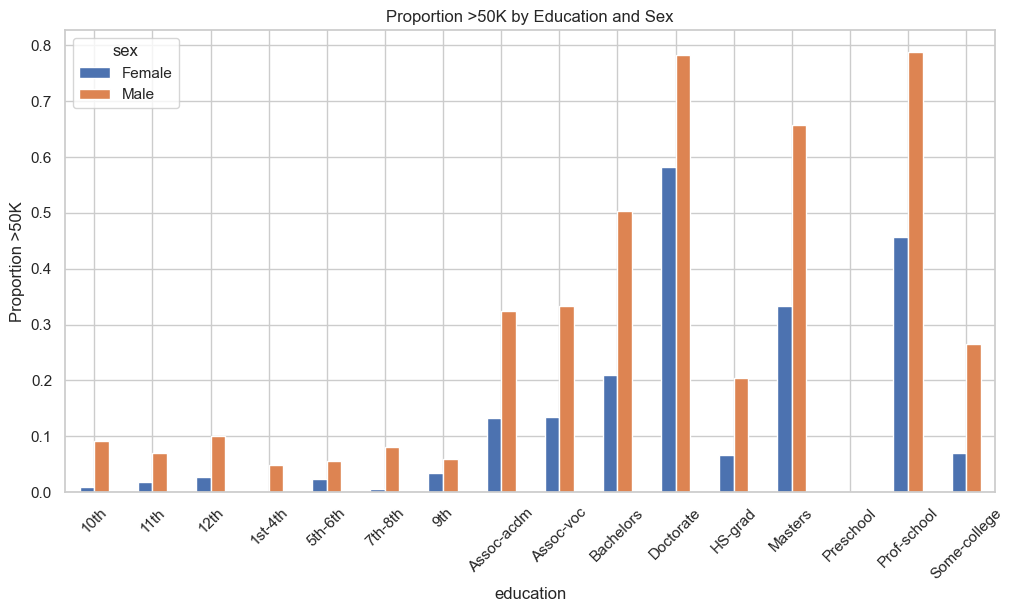

In [85]:
# Proportion of each income within education-sex groups
g = df.groupby(['education','sex'], observed=False)['income'].value_counts(normalize=True).rename('proportion').reset_index()
pivot = g[g['income']=='>50K'].pivot(index='education', columns='sex', values='proportion').fillna(0)
pivot.head(12)
pivot.plot(kind='bar', figsize=(12, 6))
plt.title('Proportion >50K by Education and Sex')
plt.ylabel('Proportion >50K')
plt.xticks(rotation=45)
plt.savefig(r"C:/Users/darre/adult_census_eda/charts/proportion_of_greaterthan50K_by_education_and_sex.png", bbox_inches='tight')
plt.show()

From this visual the data suggest that sex has a direct impact on the proportion of individuals who make >50K across all education levels.

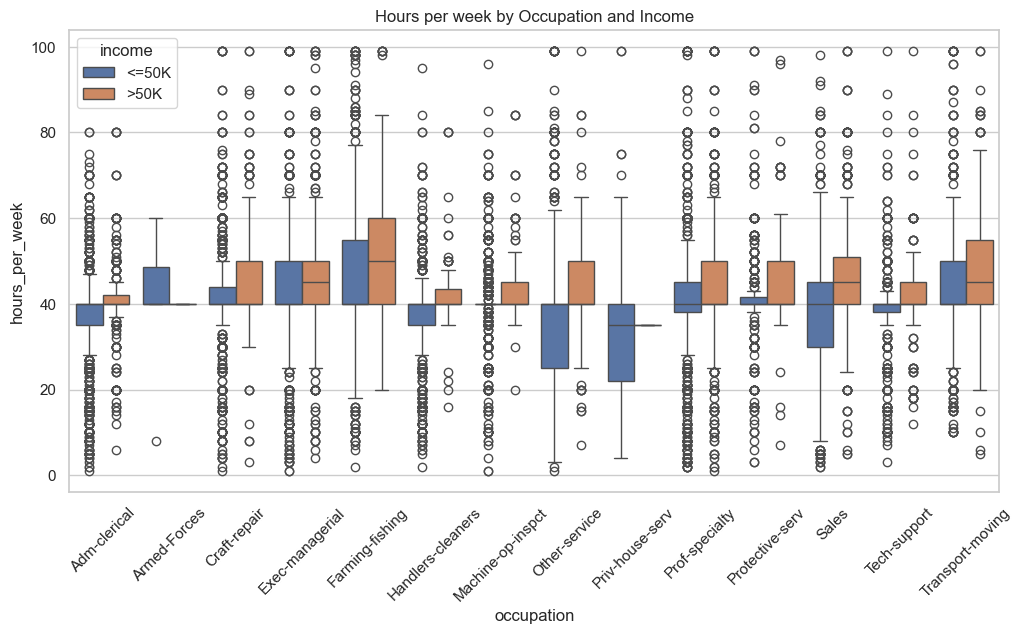

In [45]:
# Hours per week by Occupation and Income
plt.figure(figsize=(12,6))
sns.boxplot(x='occupation', y='hours_per_week', hue='income', data=df)
plt.xticks(rotation=45)
plt.title('Hours per week by Occupation and Income')
plt.savefig(r"C:/Users/darre/adult_census_eda/charts/hours_per_week_by_education_and_income.png", bbox_inches='tight')
plt.show()

Across most occupations we can see that the upper boundary of the IQR for the >50K group is greater than or equal to the upper boundary of <=50K group. The lower boundary for >50K is at or above the <=50K group. Might need to look into the distribution of missing occupation rows.

### Quick Effect-Size Checks

In [46]:
hours_means = df.groupby('income')['hours_per_week'].mean()
hours_means, round(float(hours_means['>50K'] - hours_means['<=50K']), 2)

C:\Users\darre\AppData\Local\Temp\ipykernel_400\1789396462.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_means = df.groupby('income')['hours_per_week'].mean()


(income
 <=50K    38.840210
 >50K     45.473026
 Name: hours_per_week, dtype: float64,
 6.63)

### Summary of Bivariate Findings
- Education: Higher education levels have much higher >50K proportions
- Hours: >50K groups work more hours on average across all occupations
- Confounders: Sex may confound education->income

## Multivariate Insights

### Education + Gender vs Income

<Figure size 1200x600 with 0 Axes>

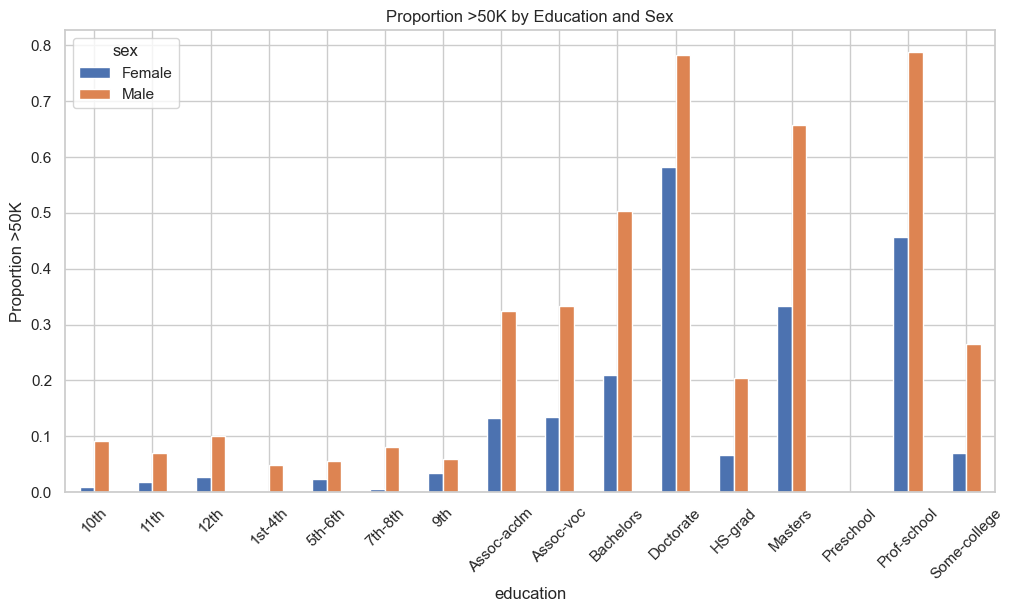

In [81]:
# Proportion >50K by Education and Sex
group1 = (
    df.groupby(['education', 'sex'], observed=False)['income']
      .value_counts(normalize=True)
      .rename('pct')
      .reset_index()
)

# Filter >50k only
group1_high = group1[group1['income'] == '>50K']

group1_high.head(2)

plt.figure(figsize=(12,6))
pivot = group1_high.pivot(index='education', columns='sex', values='pct').fillna(0)
pivot.plot(kind='bar', figsize=(12,6))
plt.title("Proportion >50K by Education and Sex")
plt.ylabel("Proportion >50K")
plt.xticks(rotation=45)
plt.show()

- The disparity of income holder >50k for females vs. males grows at higher levels of education obtained

### Occupation + Hours-Per-Week vs Income

<Figure size 1400x600 with 0 Axes>

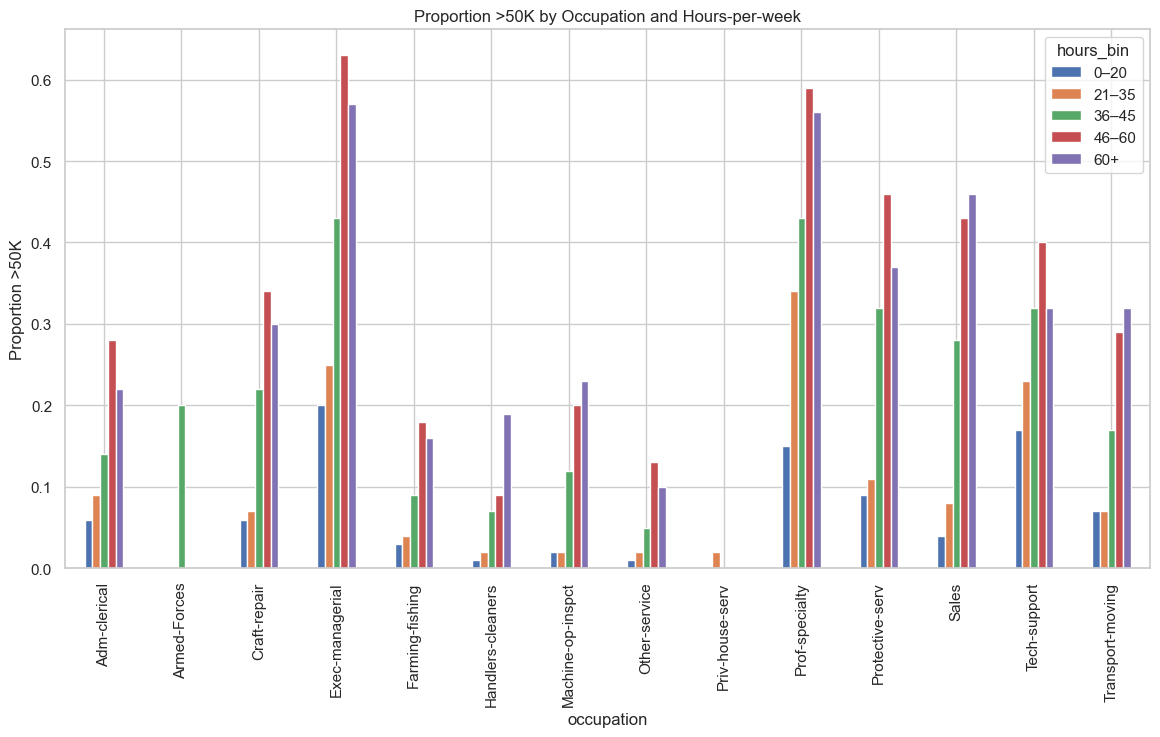

In [84]:
# Proportion >50K by Occupation and Hours-per-week
df['hours_bin'] = pd.cut(
    df['hours_per_week'],
    bins=[0, 20, 35, 45, 60, 99],
    labels=['0–20','21–35','36–45','46–60','60+']
)

group2 = (
    df.groupby(['occupation', 'hours_bin'], observed=False)['income']
        .value_counts(normalize=True)
        .round(2)
        .rename('pct')
        .reset_index()
)

group2_high = group2[group2['income'] == '>50K']
group2_high.head()

plt.figure(figsize=(14,6))
pivot2 = group2_high.pivot(index='occupation', columns='hours_bin', values='pct').fillna(0)
pivot2.plot(kind='bar', figsize=(14,7))
plt.title("Proportion >50K by Occupation and Hours-per-week")
plt.ylabel("Proportion >50K")
plt.savefig(r"C:/Users/darre/adult_census_eda/charts/Occupation_and_Hours_vs_Income.png", bbox_inches='tight')
plt.show()

- Regardless of profession, respondents who worked longer hours would be at greater odds of holding an income >50K

### Age + Sex vs Income

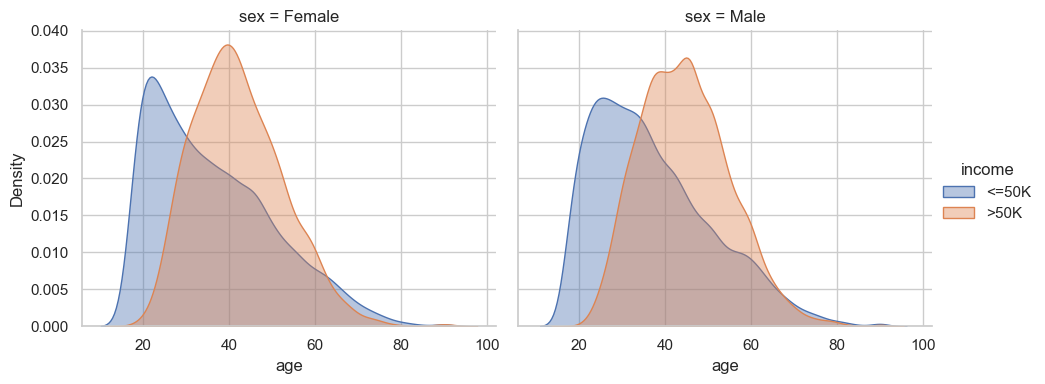

In [49]:
# Age distribution by Income & Sex
g = sns.FacetGrid(df, col='sex', hue='income', height=4, aspect=1.2)
g.map(sns.kdeplot, "age", fill=True, alpha=0.4)
g.add_legend()
plt.show()

- Both sexes have similar ratios of respondents who hold >50K vs. <=50K for any given age range

### Hours-Per-Week + Education + Income

<Figure size 1200x600 with 0 Axes>

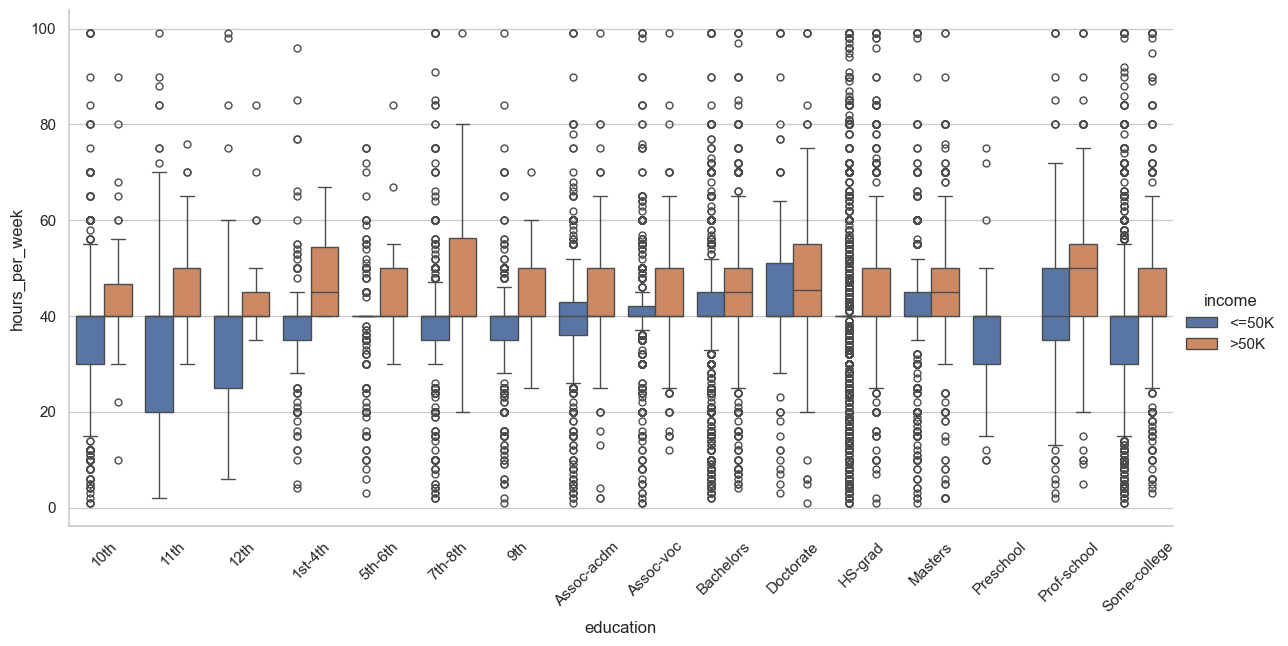

In [50]:
# Hours-per-week vs Education colored by Income
plt.figure(figsize=(12,6))
sns.catplot(
    data=df,
    x='education',
    y='hours_per_week',
    hue='income',
    kind='box',
    height=6,
    aspect=2
)
plt.xticks(rotation=45)
plt.show()

- Across all education levels, those who work more hours have a higher proportion of >50K income holder

### Correlation Matrix

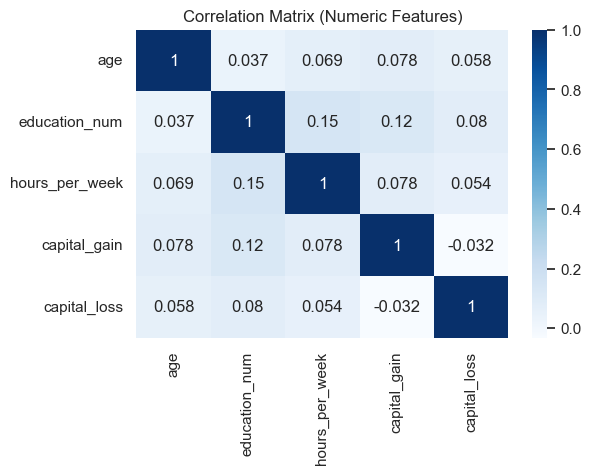

In [82]:
# Correlation Matrix
num_cols = ['age','education_num','hours_per_week','capital_gain','capital_loss']
corr = df[num_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

### Numeric Feature vs Income

In [52]:
# Numeric Features vs Income - Standardize Mean Differences
high = df[df['income']=='>50K']
low  = df[df['income']=='<=50K']

smd = {}
for col in numeric_cols:
    m1, m0 = high[col].mean(), low[col].mean()
    s = np.sqrt((high[col].var() + low[col].var())/2)
    smd[col] = round((m1 - m0)/s, 2)
    
smd

{'age': 0.6,
 'fnlwgt': -0.02,
 'education_num': 0.84,
 'capital_gain': 0.37,
 'capital_loss': 0.3,
 'hours_per_week': 0.57}

### Summary of Multivariate Findings
- The sex of a respondent and education level plays a large influence on the proportion of holders who have an income greater than 50K
- Of the group who works more hours per week, the greater the proportion of income holder >50K regardless of education level or profession
- Older groups have a greater proportion of income holders >50K regardless of sex

## Conclusions

### Summary
- Most respondents are of the age 25 to 45 and work in the private sector
- Sex, Education Level and Hour per Week worked are the greatest factors of determing whether someone may hold an income >50K
- The most insightful interaction is that for each higher level of education, the greater disparity between female vs. male >50K income holders
- Note that t-test and p-values are insufficient as the dataset is significantly large enough that there will always be statistical significance

### Future Work
**Ideas**
- Use chi-square tests
- Create demographic segments
- Examine effect size for categorical variables against income